In [1]:
import torch
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm
import scipy.ndimage
import scipy.io


In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from scipy.ndimage import gaussian_filter

class GaussianFilter(nn.Module):
    def __init__(self, kernel_size, sigma):
        super(GaussianFilter, self).__init__()
        self.kernel_size = kernel_size
        self.sigma = sigma
        self.padding = (kernel_size-1) // 2

        # 创建高斯核
        kernel = self._gaussian_kernel(kernel_size, sigma)
        self.kernel = nn.Parameter(torch.FloatTensor(kernel).unsqueeze(0).unsqueeze(0), requires_grad=False)

    def _gaussian_kernel(self, size, sigma):
        # 创建中心为1，其余为0的矩阵
        kernel = np.zeros((size, size))
        kernel[size // 2, size // 2] = 1

        # 使用 gaussian_filter 生成高斯核
        kernel = gaussian_filter(kernel, sigma, mode='constant')
        return kernel / np.sum(kernel)

    def forward(self, x):
        # 执行卷积操作
        x = F.conv2d(x, self.kernel, padding=self.padding)
        return x

tensor(1.9290)

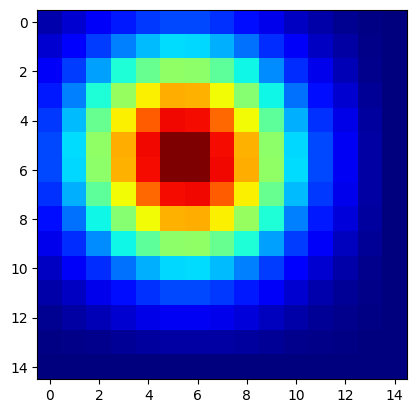

In [38]:
a=torch.zeros((15,15))
a[5,5]=1
a[6,6]=1
gf=GaussianFilter(15,3)
density=gf(a.unsqueeze(0).unsqueeze(0))[0,0]
plt.imshow(density,cmap=matplotlib.cm.jet)
torch.sum(density)

1.9006376823835647

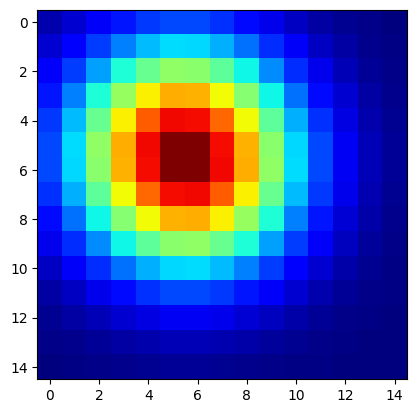

In [39]:
from sklearn.neighbors import KernelDensity

a=np.zeros((15,15))
a[5,5]=1
a[6,6]=1
density = scipy.ndimage.gaussian_filter(a, 3, mode='constant')
# density = scipy.ndimage.uniform_filter(a,size=9,mode='constant')
plt.imshow(density,cmap=matplotlib.cm.jet)
np.sum(density)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor(2.8078)


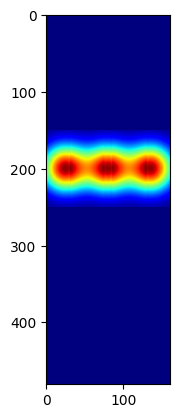

In [50]:
gf=GaussianFilter(100,20)
a=torch.zeros((480,160))
a[200,25]=1
a[200,80]=1
a[200,135]=1
a=gf(a.unsqueeze(0))
print(a)
print(torch.sum(a))
plt.imshow(a[0].numpy(),cmap=matplotlib.cm.jet)
plt.show()

/tmp/ipykernel_764946/1581729691.py:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  density = scipy.ndimage.filters.gaussian_filter(a, 25, mode='constant')


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2.6813463932543145


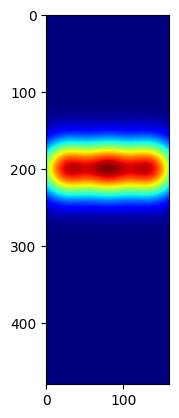

In [13]:
a=np.zeros((480,160))
a[200,25]=1
a[200,80]=1
a[200,135]=1
density = scipy.ndimage.filters.gaussian_filter(a, 25, mode='constant')
print(density)
print(np.sum(density))
plt.imshow(density,cmap=matplotlib.cm.jet)
plt.show()

In [1]:
from utils.videoutils import Player
gf=GaussianFilter(101,20).cuda()
results_path="result/D06_20210318083729_i500.pth"
bim_floor = cv2.imread("/home/gaobiaoli/dataset/base/target8F_L.png")
results=torch.load(results_path)
density=np.zeros(bim_floor.shape[:2],dtype=np.float32)
player=Player(width=bim_floor.shape[0], height=bim_floor.shape[1])
heatmapshow=None
for i in range(len(results)):
    record=torch.zeros(bim_floor.shape[:2]).float()
    for point in results[i][0]:
        record[int(point[1]),int(point[0])]+=1
    density+=gf(record.unsqueeze(0).cuda())[0].cpu().numpy()
    heatmapshow = cv2.normalize(density,heatmapshow, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    heatmapshow = cv2.applyColorMap(heatmapshow, cv2.COLORMAP_JET)
    fusion=cv2.addWeighted(heatmapshow,0.5,bim_floor,0.5,1)
    player.show(fusion)

NameError: name 'GaussianFilter' is not defined

In [7]:
record=torch.zeros(bim_floor.shape[:2]).float()
for point in results[0][0]:
    record[int(point[1]),int(point[0])]+=1

In [17]:
bim_floor.shape

(1795, 2979, 3)

In [22]:
a=torch.ones((1,1796,2980))
nn.Conv2d()
gf(a.cuda())[0].cpu().numpy().shape

(1795, 2979)

In [21]:
gf(record.unsqueeze(0).cuda())[0].cpu().numpy().shape


(1794, 2978)

In [40]:
fig,ax=plt.figure(1000,800)
ax.imshow(record[0],cmap='jet')
ax.axis('off')

TypeError: from_bounds() argument after * must be an iterable, not int

[493.0977478027344, 358.882080078125]
2
[356.2899169921875, 1080.5447998046875]
2
[258.58160400390625, 995.9290771484375]
2
[685.4745483398438, 565.8811645507812]
2
[92.12664794921875, 33.858741760253906]
0
[497.5730895996094, 478.97540283203125]
2
[214.37391662597656, 1084.0423583984375]
0
[308.26483154296875, 417.16900634765625]
2
[1027.2769775390625, 388.52362060546875]
2
[361.3486022949219, 740.0010986328125]
0
[91.78857421875, 39.50282669067383]
1
[1618.9315185546875, -73.75467681884766]
0
[206.18511962890625, 1071.9300537109375]
0
[1230.77783203125, 488.1170349121094]
2
[308.9109802246094, 417.7668151855469]
2
[416.4667053222656, 708.1459350585938]
2
[89.33403015136719, 34.595924377441406]
2
[1607.9296875, -70.30500030517578]
0
[549.9407348632812, 798.2110595703125]
1
[1556.74560546875, -65.04666900634766]
2
[487.9787902832031, 968.2246704101562]
0
[1608.11279296875, -54.35660934448242]
2
[-14.5860013961792, 25.080501556396484]
0
[495.91082763671875, 987.7485961914062]
0
[1558.21

In [10]:
results[0]

[[493.0977478027344, 358.882080078125],
 [356.2899169921875, 1080.5447998046875],
 [258.58160400390625, 995.9290771484375],
 [685.4745483398438, 565.8811645507812],
 [92.12664794921875, 33.858741760253906]]